# Danni Fehr

## Research question/interests

I am interested in analyzing the effects of various personal attributes and health determinants on the cost of medical insurance. In particular, I would like to explore whether the effects of smoking and location of where a person lives increases their medical insurance charges. I am also curious to see how attributes like smoking affect a person's BMI. 

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
data = pd.read_csv("../data/raw/insurance.csv")

In [6]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Milestone 3

### Task 1: Exploratory Data Analysis (EDA)

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

It appears as though there are no duplicates in the dataset.

<AxesSubplot:xlabel='region', ylabel='charges'>

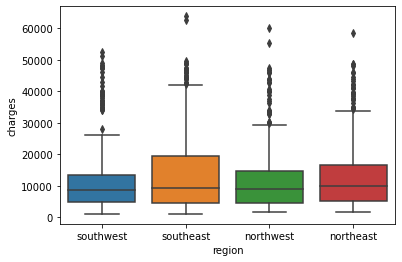

In [10]:
sns.boxplot(x="region",y="charges",data=data)

This boxplot shows that the charges based on region are very comparable based on the region each patient was from. The means appear to be very similar with variations in upper quartiles and max values. 

<AxesSubplot:xlabel='smoker', ylabel='charges'>

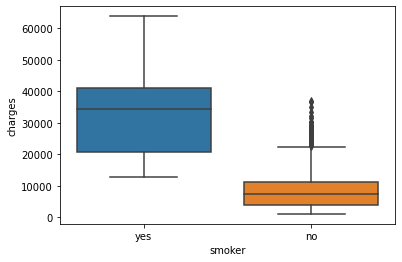

In [11]:
sns.boxplot(x="smoker",y="charges",data=data)

This boxplot shows that there is a notable difference in charges between smokers vs. nonsmokers. 

<AxesSubplot:xlabel='smoker', ylabel='bmi'>

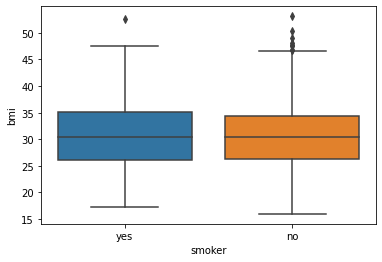

In [12]:
sns.boxplot(x="smoker",y="bmi",data=data)

This boxplot shows that BMI is very similar between smokers and non-smokers.

<AxesSubplot:xlabel='region', ylabel='Count'>

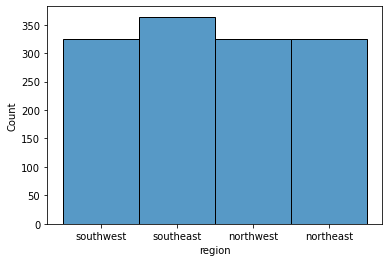

In [13]:
sns.histplot(x="region",data=data)

This histogram is a simple count of the patients from each region.

<AxesSubplot:xlabel='charges', ylabel='bmi'>

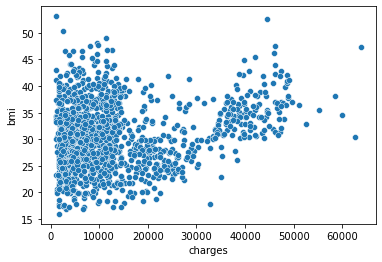

In [14]:
sns.scatterplot(x="charges",y="bmi", data=data)

This scatterplot shows a slightly positive trend towards a higher bmi being associated with higher charges but it does not appear to be a strong correlation.

# Task 2: Analysis Pipeline

### 1. Load Data

In [111]:
data = pd.read_csv("../data/raw/insurance.csv")

### 2. Clean Data

In [112]:
data = data.drop("children",axis=1)

In [113]:
data = data.drop("age",axis=1)

In [114]:
data = data.drop("sex",axis=1)

In [115]:
data

,bmi,smoker,region,charges
0,27.900,yes,southwest,16884.92400
1,33.770,no,southeast,1725.55230
2,33.000,no,southeast,4449.46200
3,22.705,no,northwest,21984.47061
4,28.880,no,northwest,3866.85520
...,...,...,...,...
1333,30.970,no,northwest,10600.54830
1334,31.920,no,northeast,2205.98080
1335,36.850,no,southeast,1629.83350
1336,25.800,no,southwest,2007.94500


The focus of my research questions are based around BMI, smoking, region and charges so I have removed the columns for sex, age and children.

### 3. Process Data

In [116]:
data["bmi"] = data["bmi"].round(0)
data["charges"] = data["charges"].round(2)
data

,bmi,smoker,region,charges
0,28.0,yes,southwest,16884.92
1,34.0,no,southeast,1725.55
2,33.0,no,southeast,4449.46
3,23.0,no,northwest,21984.47
4,29.0,no,northwest,3866.86
...,...,...,...,...
1333,31.0,no,northwest,10600.55
1334,32.0,no,northeast,2205.98
1335,37.0,no,southeast,1629.83
1336,26.0,no,southwest,2007.94


BMI values are typically rounded to the nearest integer value and charges are usually to 2 decimal points so I have made these changes to the dataframe.

In [117]:
data["northern"]=data["region"]

In [118]:
data["northern"]=data["northern"].str.contains("north")
data

,bmi,smoker,region,charges,northern
0,28.0,yes,southwest,16884.92,False
1,34.0,no,southeast,1725.55,False
2,33.0,no,southeast,4449.46,False
3,23.0,no,northwest,21984.47,True
4,29.0,no,northwest,3866.86,True
...,...,...,...,...,...
1333,31.0,no,northwest,10600.55,True
1334,32.0,no,northeast,2205.98,True
1335,37.0,no,southeast,1629.83,False
1336,26.0,no,southwest,2007.94,False


Creating of the "northern" column can allow for evaluations of how north vs. south are effected in terms of the other variables.

### 4. Wrangle Data


In [119]:
data = data[["charges", "bmi", "smoker","region","northern"]]

In [120]:
data

,charges,bmi,smoker,region,northern
0,16884.92,28.0,yes,southwest,False
1,1725.55,34.0,no,southeast,False
2,4449.46,33.0,no,southeast,False
3,21984.47,23.0,no,northwest,True
4,3866.86,29.0,no,northwest,True
...,...,...,...,...,...
1333,10600.55,31.0,no,northwest,True
1334,2205.98,32.0,no,northeast,True
1335,1629.83,37.0,no,southeast,False
1336,2007.94,26.0,no,southwest,False


Reordered the columns to feature charges and BMI first, followed by smoking and region.

# Task 3: Method Chaining

In [131]:
data = (
    pd.read_csv("../data/raw/insurance.csv")
    .drop("children",axis=1)
    .drop("age",axis=1)
    .drop("sex",axis=1)
)
data

,bmi,smoker,region,charges
0,27.900,yes,southwest,16884.92400
1,33.770,no,southeast,1725.55230
2,33.000,no,southeast,4449.46200
3,22.705,no,northwest,21984.47061
4,28.880,no,northwest,3866.85520
...,...,...,...,...
1333,30.970,no,northwest,10600.54830
1334,31.920,no,northeast,2205.98080
1335,36.850,no,southeast,1629.83350
1336,25.800,no,southwest,2007.94500
